# ML & DM ASSIGNMENT

## CLUSTERING TASK

## UNSUPERVISED CLUSTERING USING K-MEANS

### Importing

In [47]:
# IMPORTING  THE LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.cluster.hierarchy as sch

from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# RUN BEFORE IMPORTING KMeans
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [ ]:
# IMPORTING THE DATASET
df = pd.read_csv('PASSENGER SUTISFACTION.csv')

### DATA EXPLORATION

In [ ]:
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [ ]:
# Listng the unique values in the dataframe
# confirming the presence of missing values in our dat frame
df.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [ ]:
columns_drop = ['Unnamed: 0', 'id']

df.drop(columns_drop, inplace = True, axis = 1)

In [ ]:
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [ ]:
df.iloc[:, 0:15]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3


In [ ]:
df.iloc[:, 15:23]

,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,5,5,2,5,5,50,44.0,satisfied
1,4,4,3,4,5,0,0.0,satisfied
2,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,1,1,3,1,4,0,6.0,satisfied
4,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...
25971,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,5,5,5,5,4,0,0.0,satisfied
25973,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,2,5,4,5,4,0,0.0,satisfied


In [ ]:
# Checking if there are duplicate values in our dataframe.
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

In [ ]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [ ]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [ ]:
df.describe(include = 'all')


# There are a series of NanNs within our data frame. This means
# there are neither a number nor missing values within our dataset.

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,25976,25976,25976.000000,25976,25976,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,...,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000,25976
unique,2,2,NaN,2,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral or dissatisfied
freq,13172,21177,NaN,18038,12495,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14573
mean,NaN,NaN,39.620958,NaN,NaN,1193.788459,2.724746,3.046812,2.756775,2.977094,...,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857,NaN
std,NaN,NaN,15.135685,NaN,NaN,998.683999,1.335384,1.533371,1.412951,1.282133,...,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539,NaN
min,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,NaN
25%,NaN,NaN,27.000000,NaN,NaN,414.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000,NaN
50%,NaN,NaN,40.000000,NaN,NaN,849.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000,NaN
75%,NaN,NaN,51.000000,NaN,NaN,1744.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000,NaN


In [ ]:
# Mean imputation for numerical columns
df.fillna(df.mean(), inplace=True)

<ipython-input-14-80bfc99210ae>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [ ]:
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [ ]:
# Assuming 'df' is your DataFrame

# Iterate over columns in the DataFrame
for column in df.columns:
    # Check if the column is of type 'object' (assuming it's categorical)
    if df[column].dtype == 'object':
        # Print the column name
        print(f"Unique values for '{column}':")

        # Print unique values and their counts
        print(df[column].value_counts())
        print("\n" + "="*30 + "\n")  # Separator for better readability


Unique values for 'Gender':
Female    13172
Male      12804
Name: Gender, dtype: int64


Unique values for 'Customer Type':
Loyal Customer       21177
disloyal Customer     4799
Name: Customer Type, dtype: int64


Unique values for 'Type of Travel':
Business travel    18038
Personal Travel     7938
Name: Type of Travel, dtype: int64


Unique values for 'Class':
Business    12495
Eco         11564
Eco Plus     1917
Name: Class, dtype: int64


Unique values for 'satisfaction':
neutral or dissatisfied    14573
satisfied                  11403
Name: satisfaction, dtype: int64




In [ ]:
numerical_col = df.select_dtypes(include=['int64', 'float64']).columns

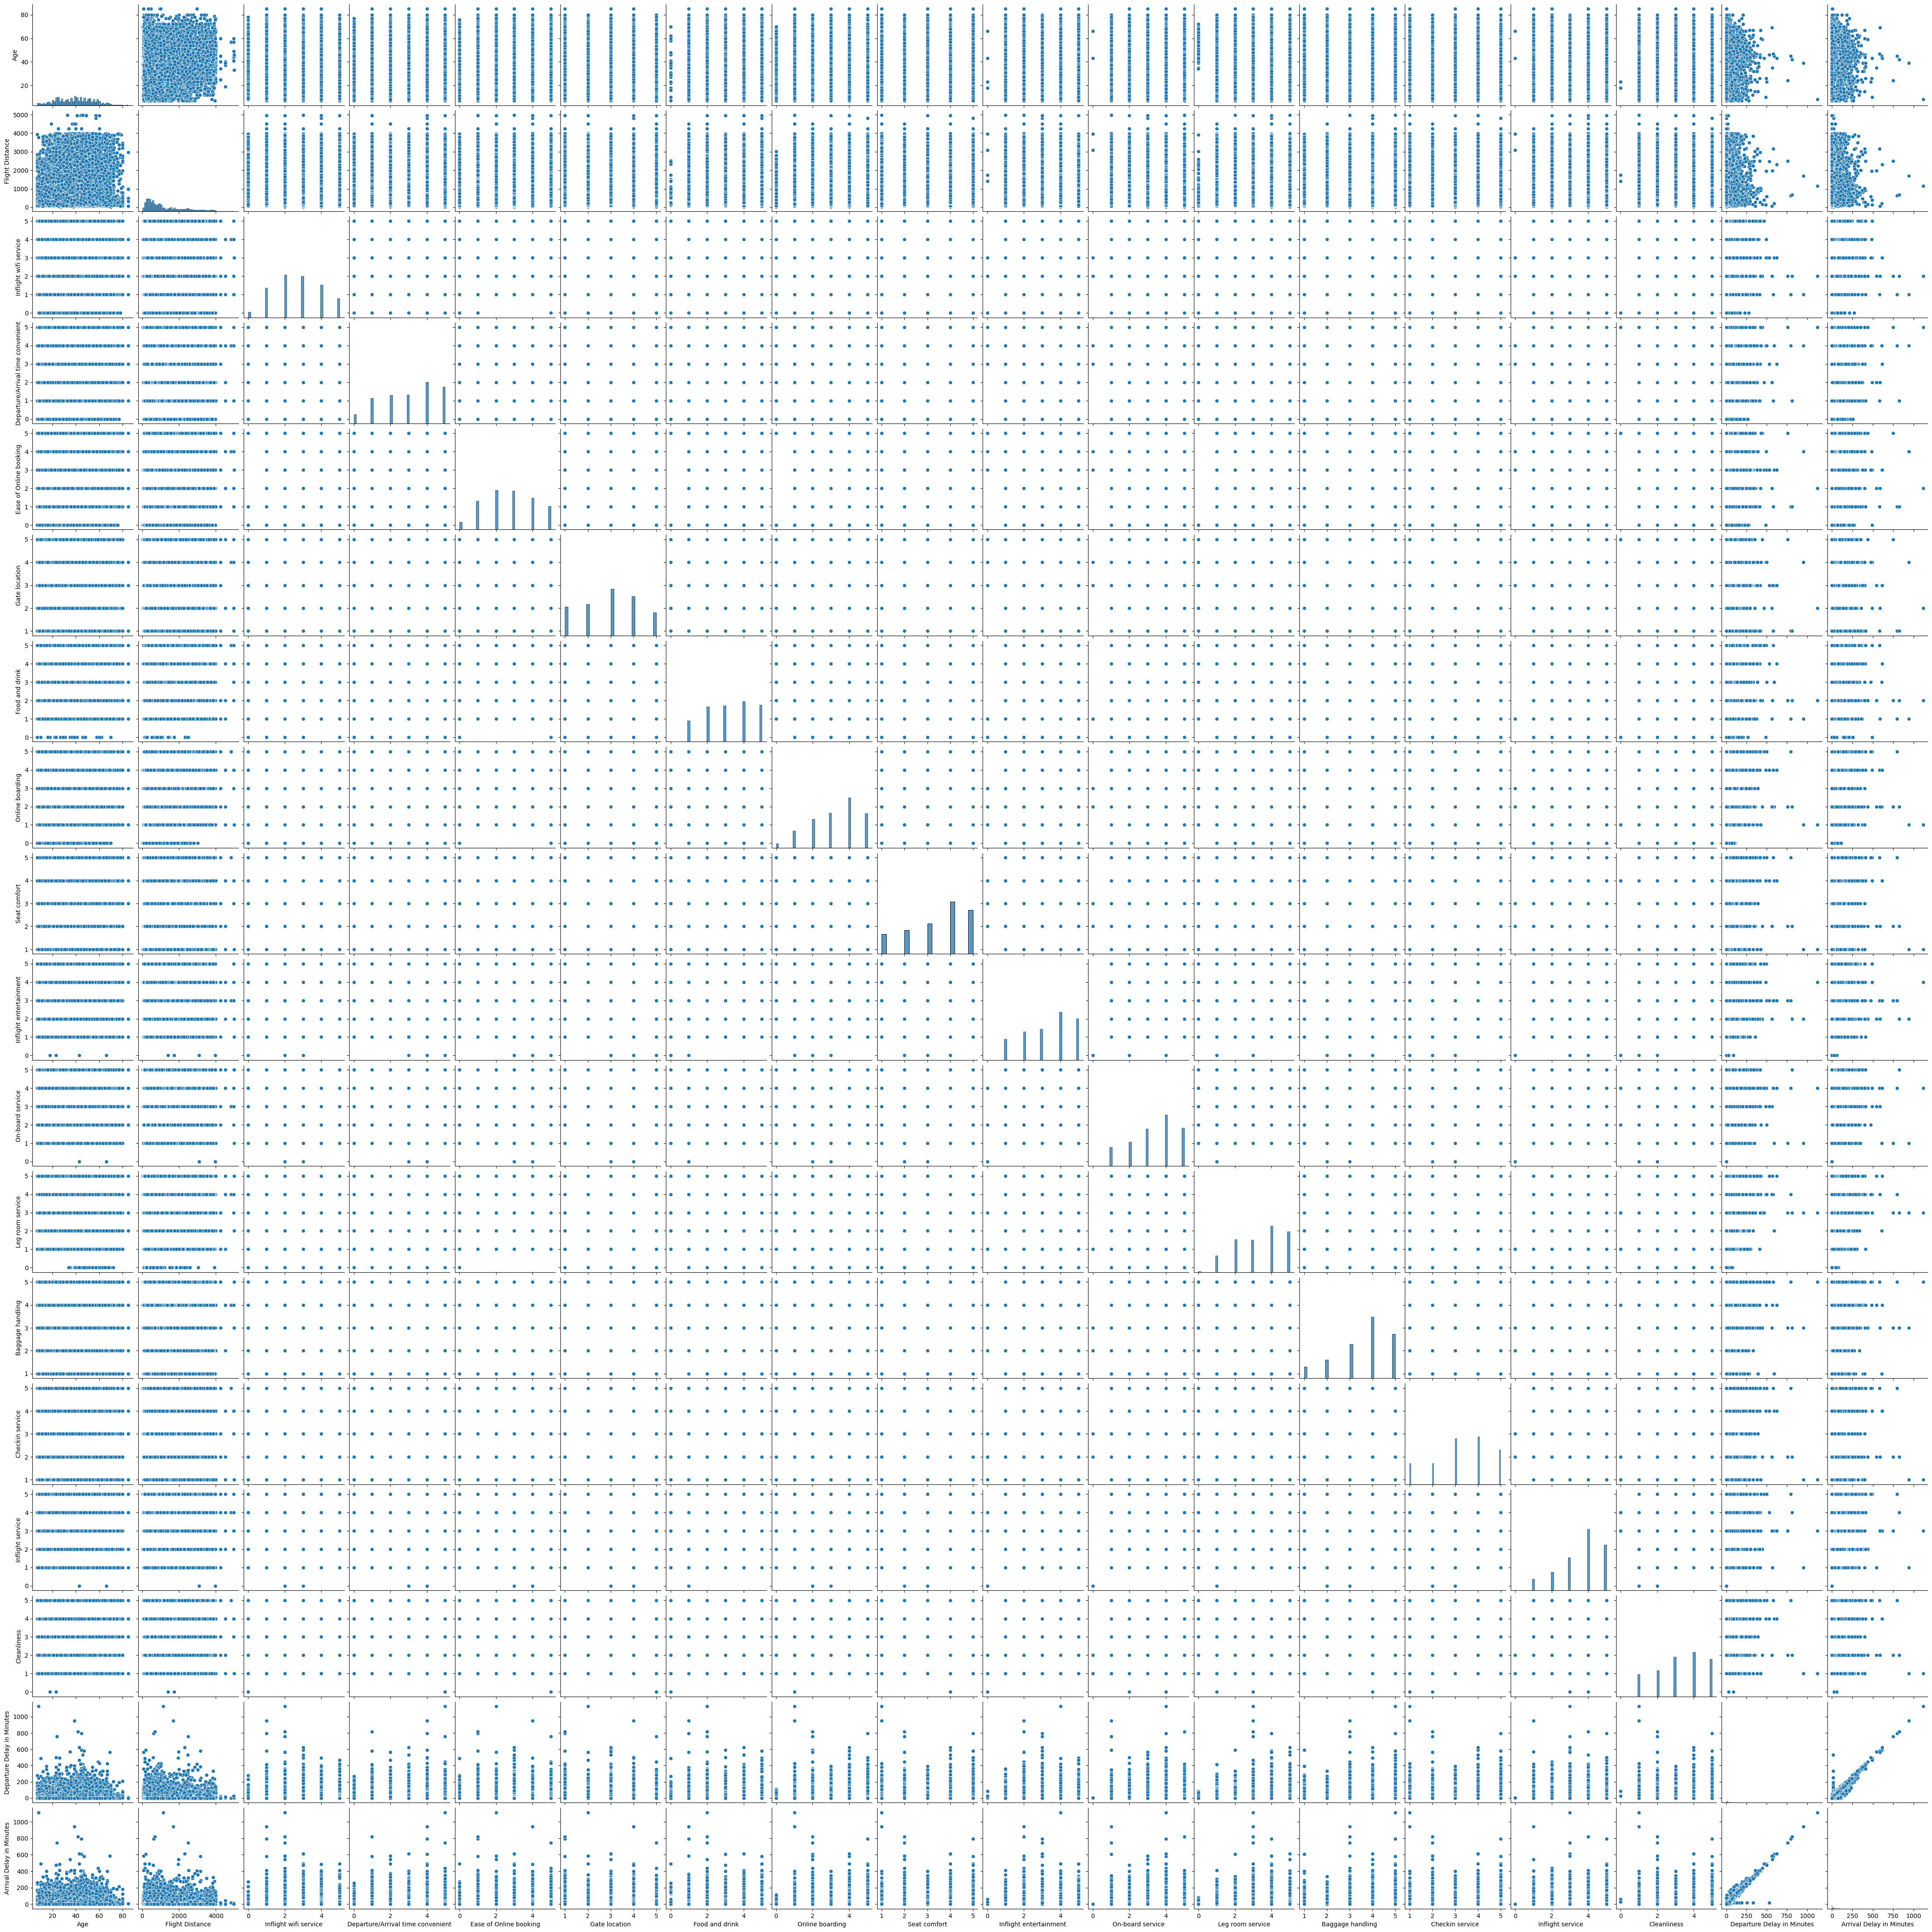

In [ ]:
sns.pairplot(df[numerical_col])
plt.show()

In [ ]:
#columns_to_impute = ['Gender', 'Customer Type', 'Class', 'Inflight wifi service', 'Ease of Online booking', 'Gate location',
                      #'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service',
                      #'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness',
                      #'satisfaction']
#df[columns_to_impute] = df[columns_to_impute].apply(lambda x: x.fillna(x.mode()[0]))


In [ ]:
#  IDENTIFYING UNNECESSARY COLUMNS TO DROP


In [ ]:
# DROPPING UNNECESSARY COLUMNS
# df.drop(columns=columnstodrop, inplace=True)

### DATA PRE-PROCESSING

In [ ]:
df_processed = df.copy()

In [ ]:
categorical_col = df_processed.select_dtypes(include=['object']).columns
numerical_col = df_processed.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
# Changing catagorical data to.....
enc = OrdinalEncoder()
df_processed[categorical_col] = enc.fit_transform(df[categorical_col])

In [ ]:
df_processed

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0.0,0.0,52,0.0,1.0,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1.0
1,0.0,0.0,36,0.0,0.0,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1.0
2,1.0,1.0,20,0.0,1.0,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0.0
3,1.0,0.0,44,0.0,0.0,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1.0
4,0.0,0.0,49,0.0,1.0,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,1.0,1.0,34,0.0,0.0,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,0.0
25972,1.0,0.0,23,0.0,0.0,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,1.0
25973,0.0,0.0,17,1.0,1.0,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,0.0
25974,1.0,0.0,14,0.0,0.0,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,1.0


In [ ]:
# What does this command do??????/ # Standardize the data
scaler = MinMaxScaler()
df_processed[numerical_col] = scaler.fit_transform(df[numerical_col])

In [ ]:
df_processed

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0.0,0.0,0.576923,0.0,1.0,0.026050,1.0,0.8,0.6,0.75,...,1.0,1.0,1.0,1.00,0.25,1.0,1.0,0.044326,0.039462,1.0
1,0.0,0.0,0.371795,0.0,0.0,0.571890,0.2,0.2,0.6,0.00,...,0.8,0.8,0.8,0.75,0.50,0.8,1.0,0.000000,0.000000,1.0
2,1.0,1.0,0.166667,0.0,1.0,0.032512,0.4,0.0,0.4,0.75,...,0.4,0.8,0.2,0.50,0.25,0.4,0.4,0.000000,0.000000,0.0
3,1.0,0.0,0.474359,0.0,0.0,0.675687,0.0,0.0,0.0,0.25,...,0.2,0.2,0.2,0.00,0.50,0.2,0.8,0.000000,0.005381,1.0
4,0.0,0.0,0.538462,0.0,1.0,0.232431,0.4,0.6,0.8,0.50,...,0.4,0.4,0.4,0.25,0.75,0.4,0.8,0.000000,0.017937,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,1.0,1.0,0.346154,0.0,0.0,0.099960,0.6,0.6,0.6,0.00,...,0.8,0.6,0.4,0.75,0.75,1.0,0.8,0.000000,0.000000,0.0
25972,1.0,0.0,0.205128,0.0,0.0,0.124192,0.8,0.8,0.8,0.75,...,0.8,0.8,1.0,1.00,1.00,1.0,0.8,0.000000,0.000000,1.0
25973,0.0,0.0,0.128205,1.0,1.0,0.160945,0.4,1.0,0.2,1.00,...,0.4,0.8,0.6,0.75,1.00,0.8,0.4,0.000000,0.000000,0.0
25974,1.0,0.0,0.089744,0.0,0.0,0.221325,0.6,0.6,0.6,0.50,...,0.8,0.6,0.4,1.00,0.75,1.0,0.8,0.000000,0.000000,1.0


In [ ]:
# Extract numerical variables from df_processed
x = df_processed[numerical_col]

In [ ]:
x

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.576923,0.026050,1.0,0.8,0.6,0.75,0.6,0.8,0.50,1.0,1.0,1.0,1.00,0.25,1.0,1.0,0.044326,0.039462
1,0.371795,0.571890,0.2,0.2,0.6,0.00,1.0,0.8,1.00,0.8,0.8,0.8,0.75,0.50,0.8,1.0,0.000000,0.000000
2,0.166667,0.032512,0.4,0.0,0.4,0.75,0.4,0.4,0.25,0.4,0.8,0.2,0.50,0.25,0.4,0.4,0.000000,0.000000
3,0.474359,0.675687,0.0,0.0,0.0,0.25,0.6,0.8,0.75,0.2,0.2,0.2,0.00,0.50,0.2,0.8,0.000000,0.005381
4,0.538462,0.232431,0.4,0.6,0.8,0.50,0.8,0.2,0.25,0.4,0.4,0.4,0.25,0.75,0.4,0.8,0.000000,0.017937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,0.346154,0.099960,0.6,0.6,0.6,0.00,0.8,0.6,0.75,0.8,0.6,0.4,0.75,0.75,1.0,0.8,0.000000,0.000000
25972,0.205128,0.124192,0.8,0.8,0.8,0.75,0.8,0.8,0.75,0.8,0.8,1.0,1.00,1.00,1.0,0.8,0.000000,0.000000
25973,0.128205,0.160945,0.4,1.0,0.2,1.00,0.4,0.2,0.25,0.4,0.8,0.6,0.75,1.00,0.8,0.4,0.000000,0.000000
25974,0.089744,0.221325,0.6,0.6,0.6,0.50,0.8,0.8,0.75,0.8,0.6,0.4,1.00,0.75,1.0,0.8,0.000000,0.000000


In [ ]:
selected_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

x_selected = x[selected_columns].values

In [ ]:
x_selected

array([[0.57692308, 0.02605008, 0.04432624, 0.03946188],
       [0.37179487, 0.57189015, 0.        , 0.        ],
       [0.16666667, 0.03251212, 0.        , 0.        ],
       ...,
       [0.12820513, 0.16094507, 0.        , 0.        ],
       [0.08974359, 0.22132472, 0.        , 0.        ],
       [0.44871795, 0.0470517 , 0.        , 0.        ]])

In [ ]:
#unique_values = dataset_processed['Gender'].unique()
#print(f"Unique values in {'Gender'}: {unique_values}")

In [ ]:
#gender_mapping = {"Male": 1, "Female": 2}
#dataset_processed['Gender'] = dataset_processed['Gender'].map(gender_mapping)



In [ ]:
#travel_type_mapping = {"Business travel": 1, "Personal Travel": 2}
#dataset_processed['Type of Travel'] = dataset_processed['Type of Travel'].map(travel_type_mapping)


In [ ]:
#Class_mapping = {"Business": 1, "Eco Plus": 2, "Eco": 3}
#dataset_processed['Class'] = dataset_processed['Class'].map(Class_mapping)

In [ ]:
#satisfaction_mapping = {"satisfied": 1, "neutral or dissatisfied": 2}
#dataset_processed['satisfaction'] = dataset_processed['satisfaction'].map(satisfaction_mapping)

In [ ]:
#Customer Type_mapping = {"Loyal Customer": 1, "disloyal Customer": 2}
#dataset_processed['Customer Type'] = dataset_processed['Customer Type'].map(Customer Type_mapping)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

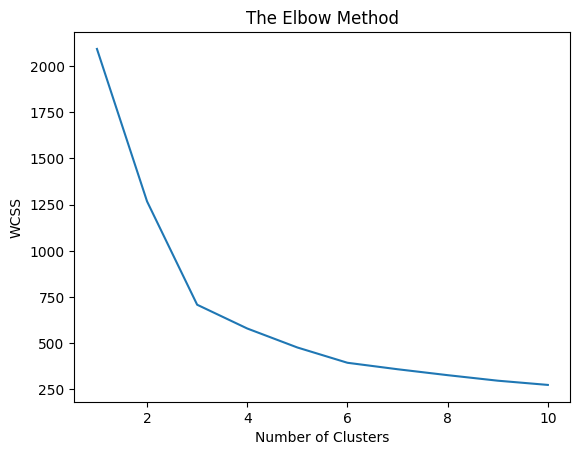

In [ ]:
wcss = []
for i in range (1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
  kmeans.fit(x_selected)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(x_selected)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


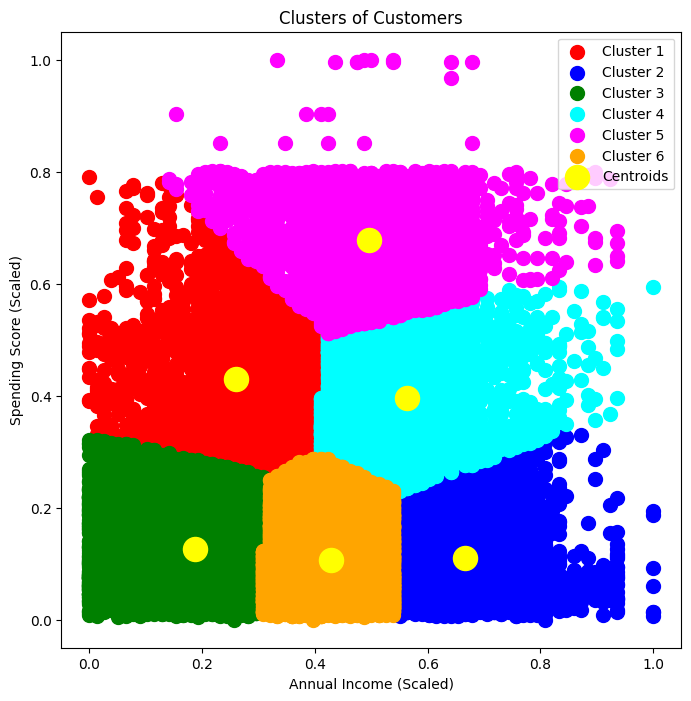

In [ ]:
# Visualising the clusters
plt.figure(figsize=(8,8))
plt.scatter(x_selected[y_kmeans == 0, 0], x_selected[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x_selected[y_kmeans == 1, 0], x_selected[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x_selected[y_kmeans == 2, 0], x_selected[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x_selected[y_kmeans == 3, 0], x_selected[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x_selected[y_kmeans == 4, 0], x_selected[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(x_selected[y_kmeans == 5, 0], x_selected[y_kmeans == 5, 1], s = 100, c = 'orange', label = 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('X-Axis (Scaled)')
plt.ylabel('Y-Axis (Scaled)')
plt.legend()
plt.show()

In [54]:
pca = PCA(n_components = 2)
x_reduced = pca.fit_transform(x_selected)

pca.explained_variance_ratio_

array([0.53796136, 0.43436642])

In [55]:
sum(pca.explained_variance_ratio_)

0.9723277885056251

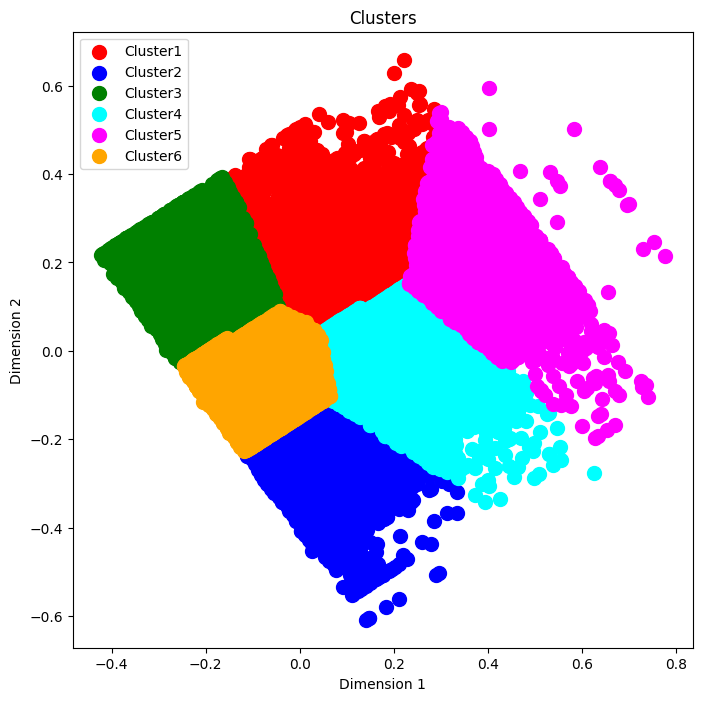

In [56]:
colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'orange']

plt.figure(figsize = (8,8))
for i in range(6):
  plt.scatter(x_reduced[y_kmeans == i, 0], x_reduced[y_kmeans == i, 1],
            s = 100, c =colors[i], label ='Cluster' +str(i+1))
plt.title('Clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

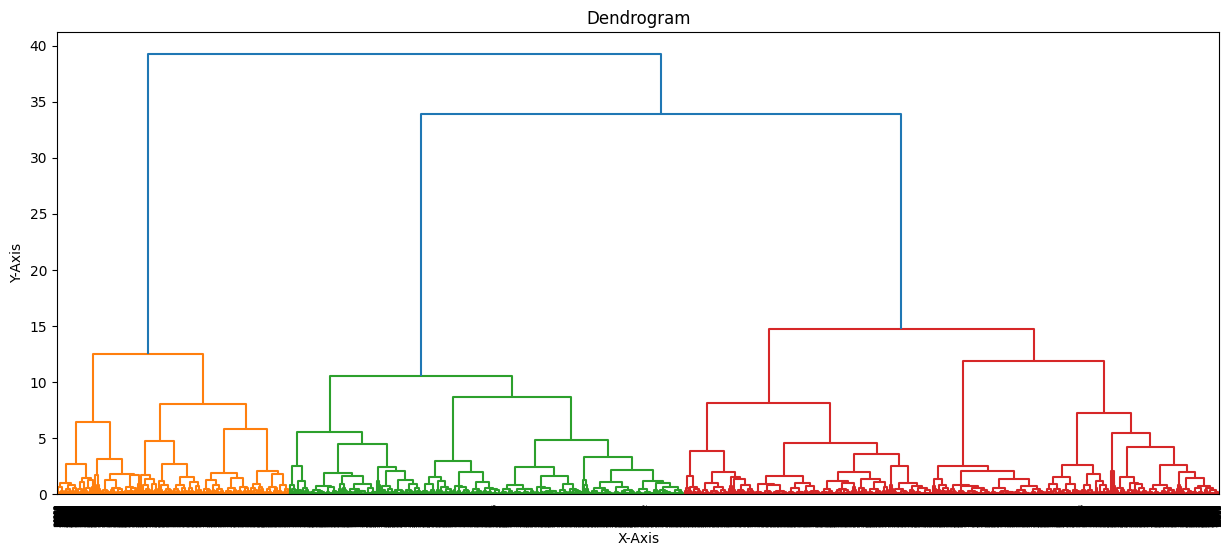

In [ ]:
plt.figure(figsize = (15, 6))
dendrogram = sch.dendrogram(sch.linkage(x_selected, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.show()

In [44]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x_selected)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


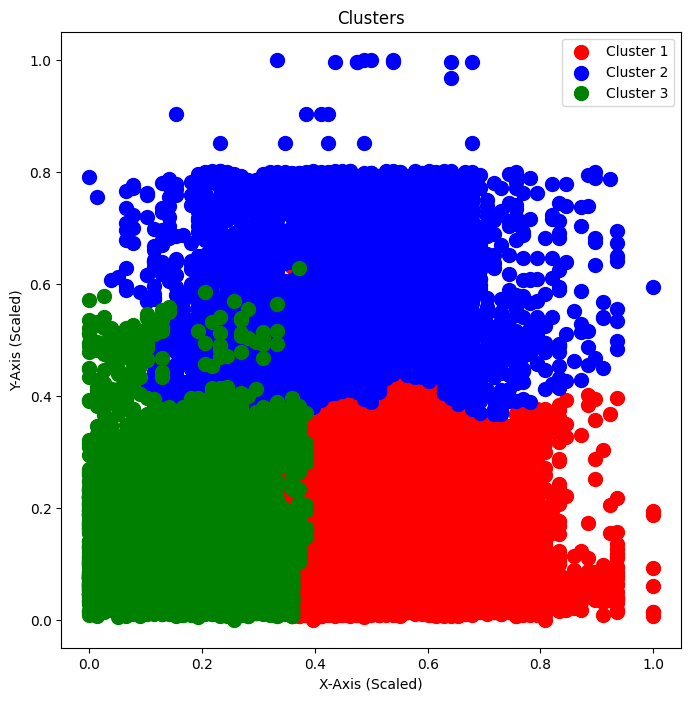

In [46]:
# Visualising the clusters
plt.figure(figsize=(8,8))
plt.scatter(x_selected[y_hc == 0, 0], x_selected[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x_selected[y_hc == 1, 0], x_selected[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x_selected[y_hc == 2, 0], x_selected[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# plt.scatter(x_selected[y_hc == 3, 0], x_selected[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(x_selected[y_hc == 4, 0], x_selected[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.scatter(x_selected[y_hc == 5, 0], x_selected[y_hc == 5, 1], s = 100, c = 'orange', label = 'Cluster 6')
plt.title('Clusters')
plt.xlabel('X-Axis (Scaled)')
plt.ylabel('Y-Axis (Scaled)')
plt.legend()
plt.show()

#### K-MEANS CLUSTERING ALGORITHM

In [ ]:
# SELECTING RELEVANT COLUMNS
columnstoplot = ['Gender', 'Customer Type', 'Class', 'Inflight wifi service', 'Ease of Online booking', 'Gate location',
                      'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service',
                      'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness',
                 'satisfaction']
subset_df= df[columnstoplot]
sns.pairplot(subset_df, diag_kind = 'kde',
             markers = ["o", "s"], palette = 'husl')

plt.show()

In [ ]:
# Assuming you have a specific number of clusters (n_clusters) in mind
n_clusters = 3

# Combine the encoded categorical and scaled numerical columns
X = pd.concat([df_processed[categorical_col], df_processed[numerical_col]], axis=1)

# Perform k-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_processed['cluster'] = kmeans.fit_predict(X)

In [ ]:
# Elbow Plot to find the optimal number of clusters

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++',random_state=42)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [ ]:
# Apply K-means clustering

kmeans = KMeans(n_clusters=4, init = 'k-means++', random_state = 42)
y_kmeans= kmeans.fit_predict(x)

In [ ]:


plt.figure(figsize=(8,8))

plt.scatter(x[y_kmeans ==0,0],x[y_kmeans ==0,1], s= 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans ==1,0],x[y_kmeans ==1,1], s= 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans ==2,0],x[y_kmeans ==2,1], s= 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans ==3,0],x[y_kmeans ==3,1], s= 100, c = 'cyan', label = 'Cluster 4')
plt.xlabel('?')
plt.ylabel('?')
plt.legend()
plt.title('?')
plt.show()

#plt.scatter(x[y_kmeans] == 0]['Flight Distance'], df[df['KMeans_Cluster'] == 0]['Age'], s=100, c='red', label='Cluster 1')
#plt.scatter(df[df['KMeans_Cluster'] == 1]['Flight Distance'], df[df['KMeans_Cluster'] == 1]['Age'], s=100, c='blue', label='Cluster 2')
#plt.scatter(df[df['KMeans_Cluster'] == 2]['Flight Distance'], df[df['KMeans_Cluster'] == 2]['Age'], s=100, c='green', label='Cluster 3')
#plt.scatter(df[df['KMeans_Cluster'] == 3]['Flight Distance'], df[df['KMeans_Cluster'] == 3]['Age'], s=100, c='cyan', label='Cluster 4')
#plt.scatter(kmeans.cluster_centers_[:, 0], engers')
#plt.xlabel('Flight Distance')
#plt.ylabel('Age')
#plt.legend()kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
#plt.title('KMeans Clusters of Airline Pass
#plt.show()

#### HIERARCHICAL CLUSTERING ALGORITHM

In [ ]:
# Selecting only numerical columns for hierarchical clustering
df_numeric = df[['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient',
                 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding',
                 'Seat comfort', 'Inflight entertainment', 'Leg room service', 'Baggage handling',
                 'Checkin service', 'Cleanliness']]


scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Performing hierarchical clustering
linkage_matrix = linkage(df_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, orientation='top', labels=df_numeric.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clusters of Airline Passengers')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()

In [ ]:
# Print statements for debugging
print("Shape of data_scaled:", data_scaled.shape)

In [ ]:
# Ploting a heatmap
sns.clustermap(data_scaled, method='ward', cmap='viridis', figsize=(12, 8), standard_scale=1)
plt.title('Hierarchical Clustering Heatmap')
plt.show()

In [ ]:

 # Evaluate clustering performance using silhouette score
# Standardize the data if necessary

silhouette_kmeans = silhouette_score(df_scaled, df['KMeans_Cluster'])
silhouette_hierarchical = silhouette_score(df_scaled, df['Hierarchical_Cluster'])


In [ ]:
# Print silhouette scores

print(f"Silhouette Score - K-Means: {silhouette_kmeans}")
print(f"Silhouette Score - Hierarchical: {silhouette_hierarchical}")
